In [15]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
def map_inext_results(grid, column):
    grid_gdf = gpd.read_file(f'grids/{grid}km_behrmann_grid.shp')
    output_df = pd.read_csv(f'iNext_output/{grid}_summary.csv')

    # join the two dataframes by the grid id
    output_df["tile_id"] = output_df["id"]
    grid_gdf = grid_gdf.merge(output_df, on='tile_id')

    world = gpd.read_file("data/ne_50m_land.shp").to_crs("ESRI:54017")

    # plot grid800 with column obs.D0 values using behrmann grid as background map
    fig, ax = plt.subplots(figsize=(20, 20))
    grid_gdf.plot(column=column, ax=ax, cmap="magma")
    world.boundary.plot(ax=ax, edgecolor="white", linewidth=0.5)
    ax.set_facecolor('black')
    plt.title(f'{grid}km grid with {column} values')
    plt.savefig(f'maps/{grid}_{column}.png')

In [36]:
scs = ['SC2.D0', 'SC2.D1', 'SC2.D2', 'SC5.D0', 'SC5.D1', 'SC5.D2', 'SC7.D0', 'SC7.D1', 'SC7.D2']

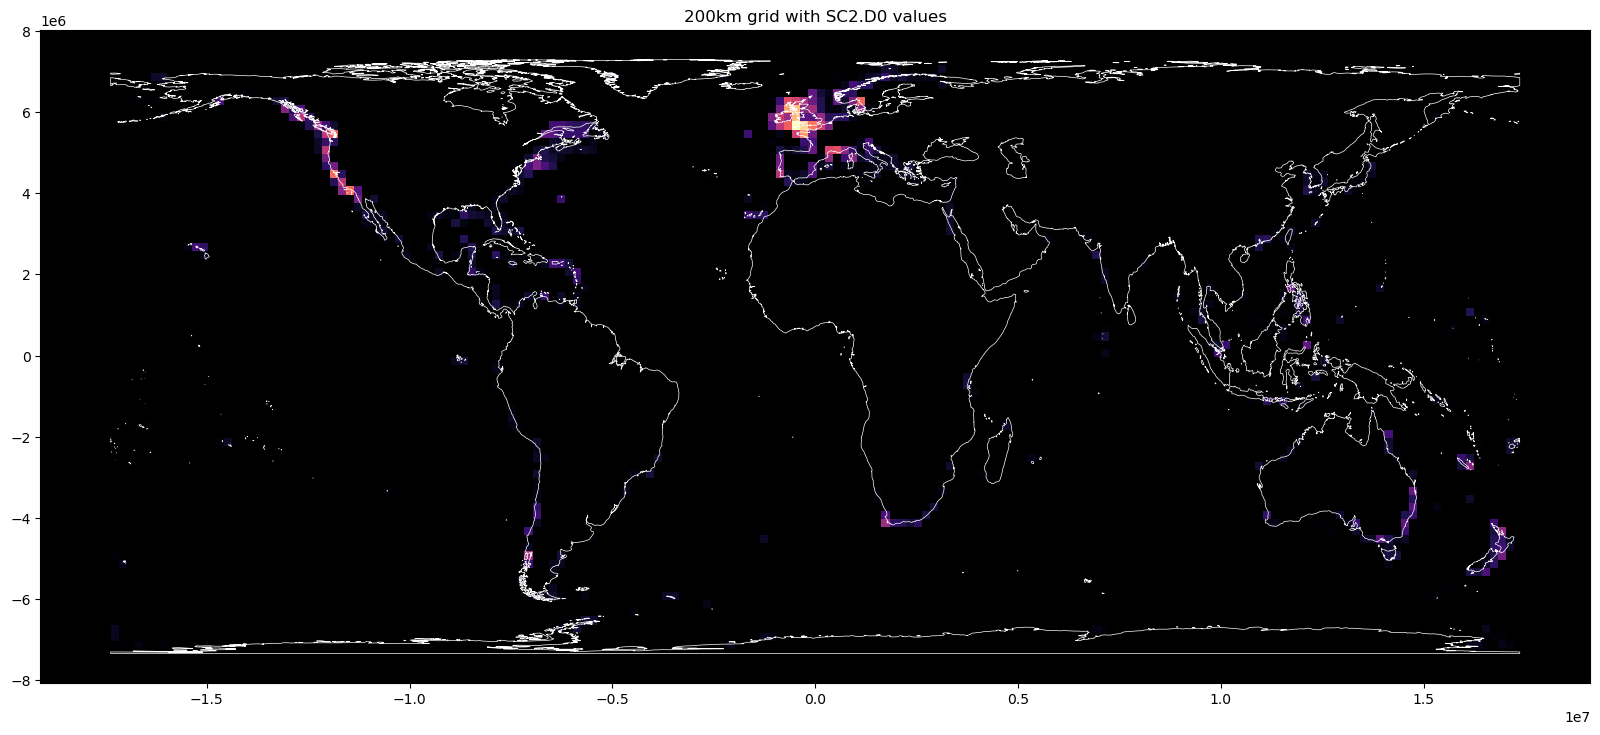

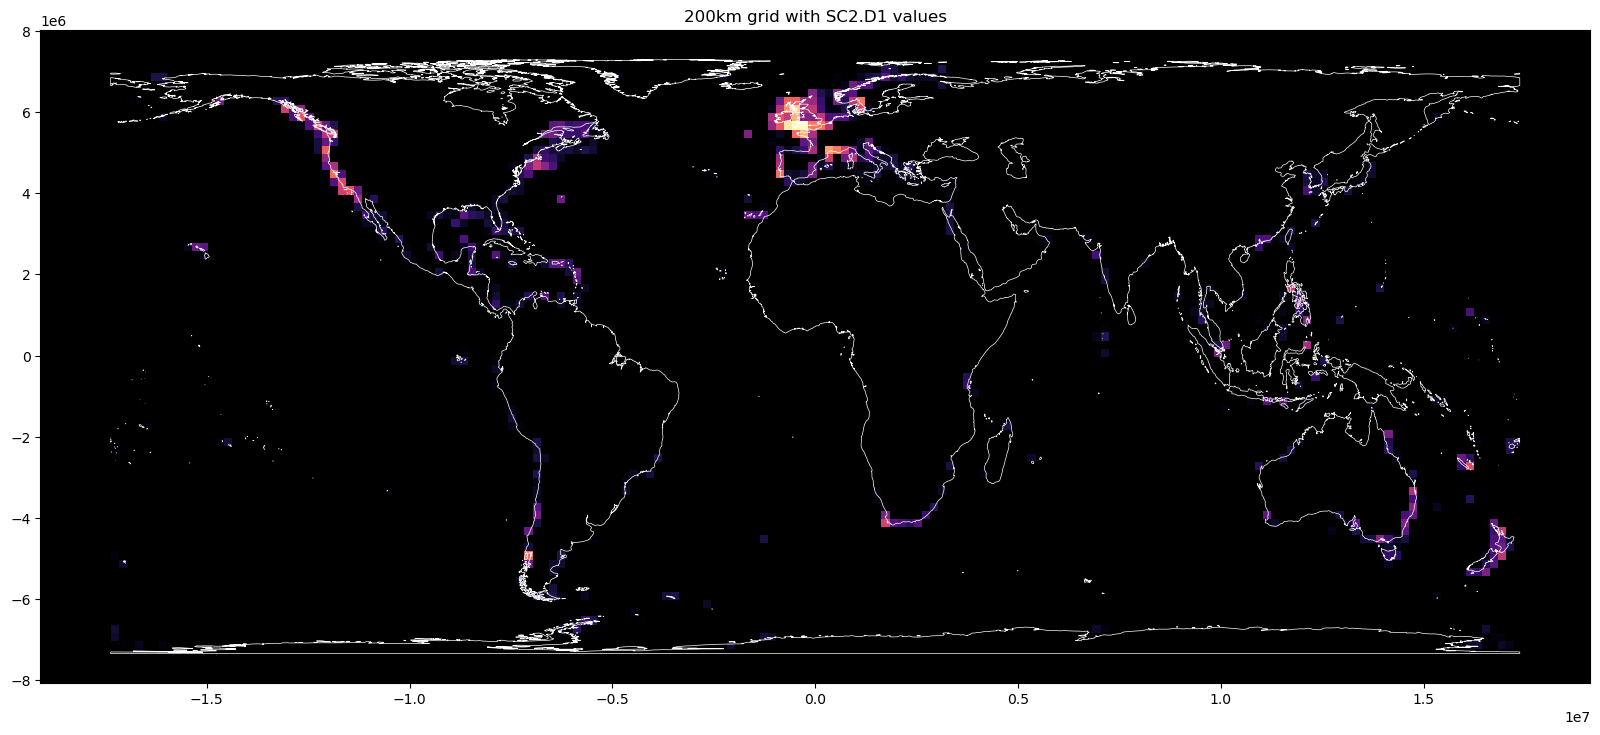

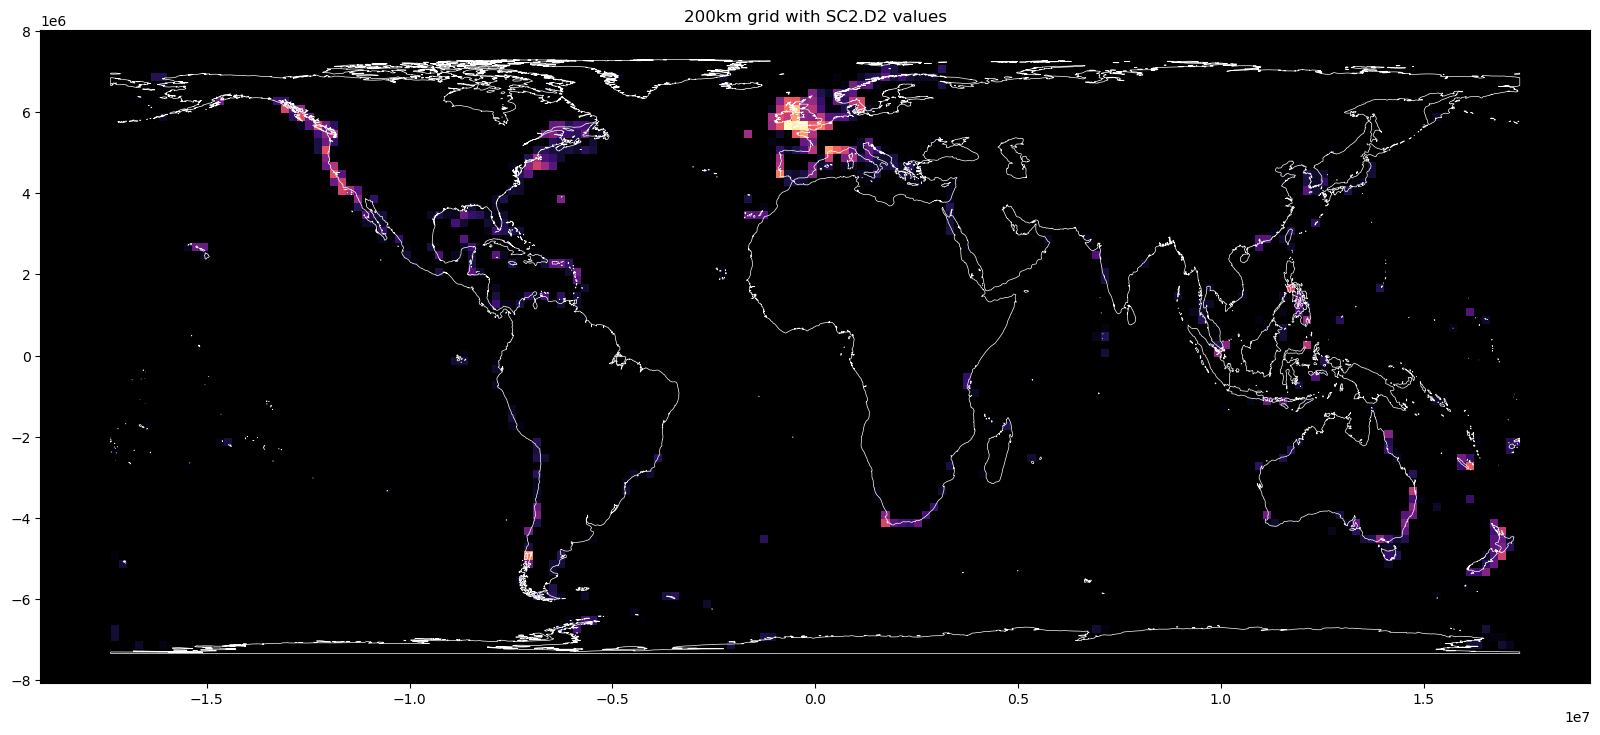

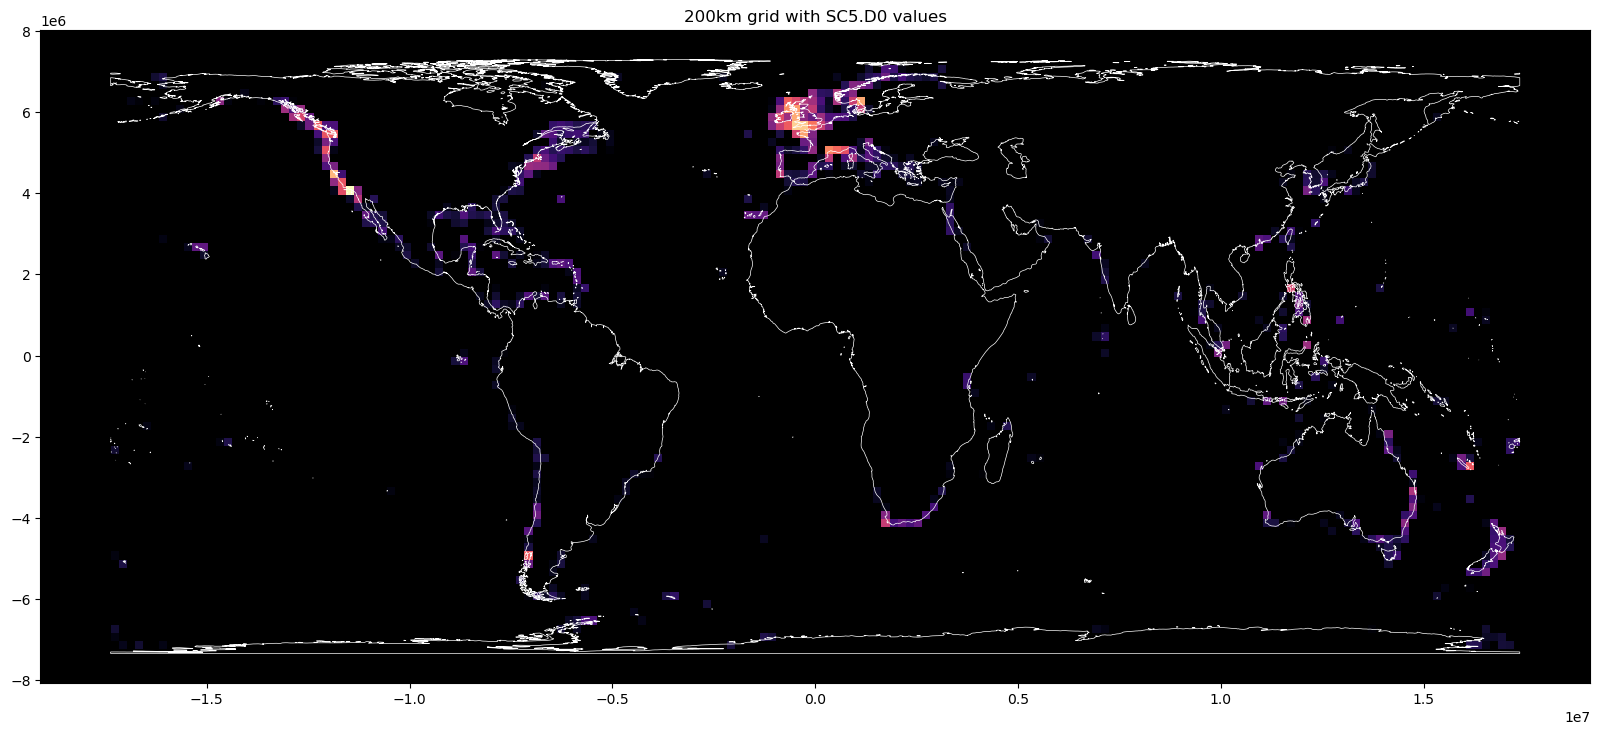

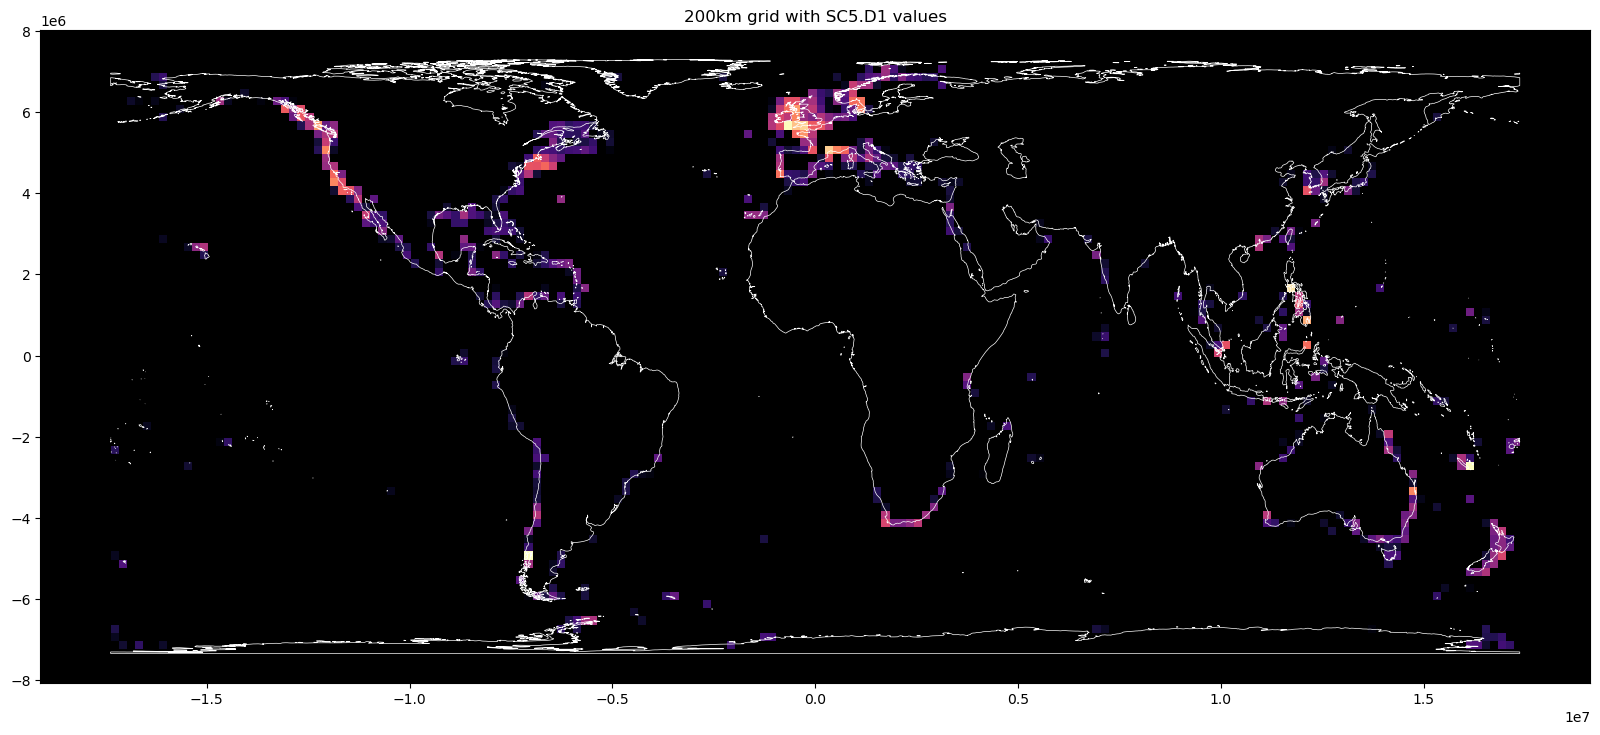

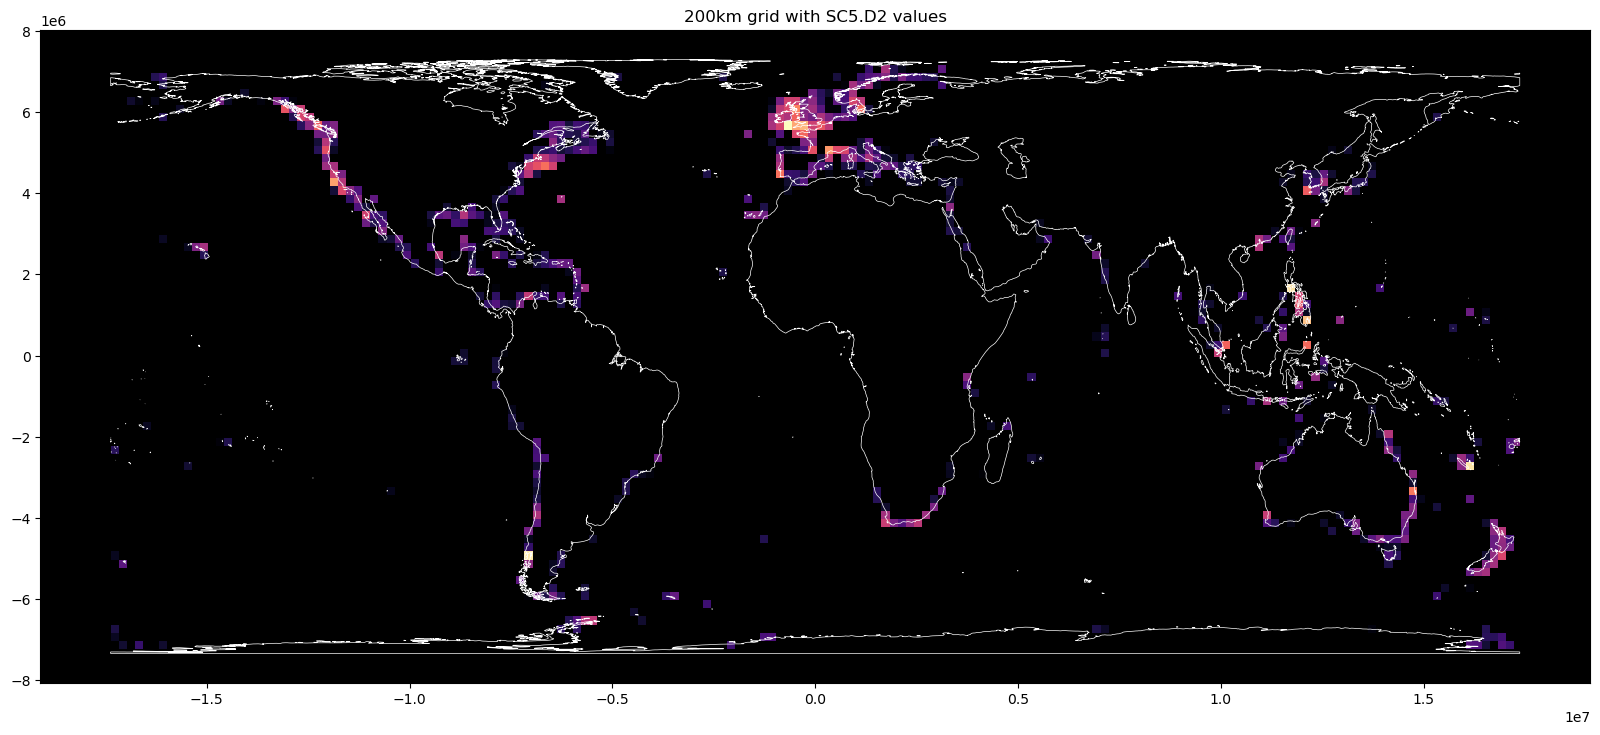

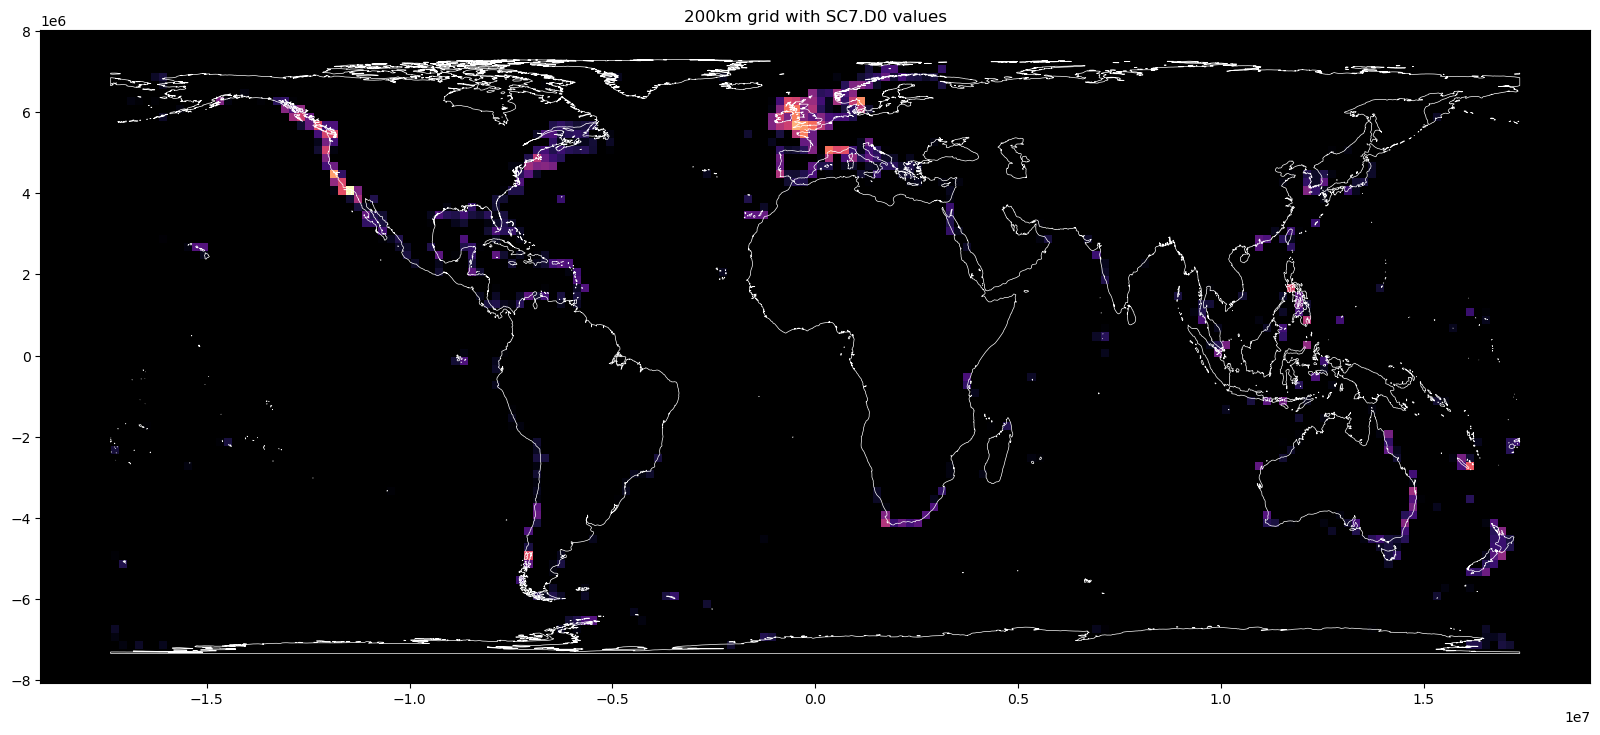

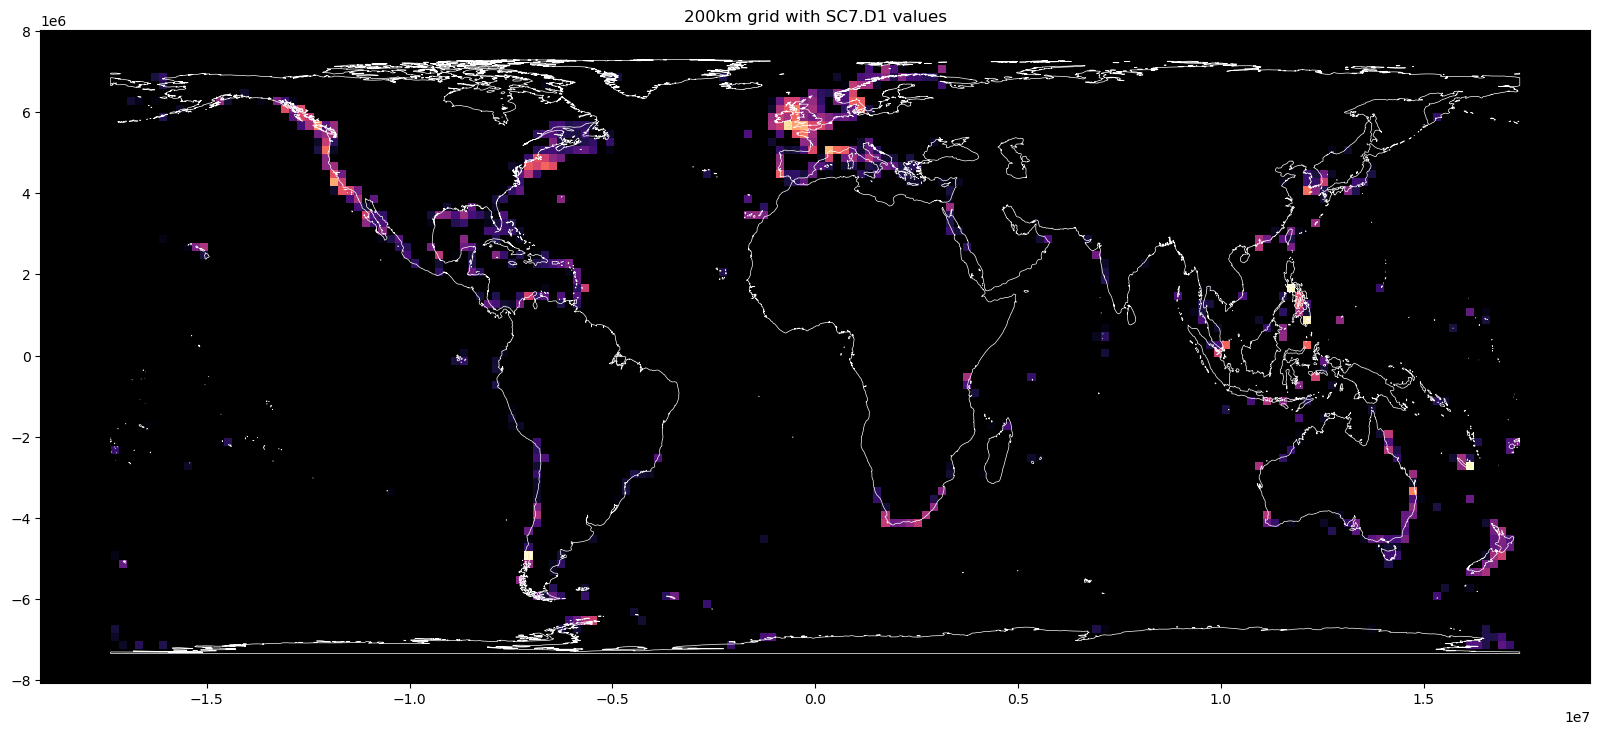

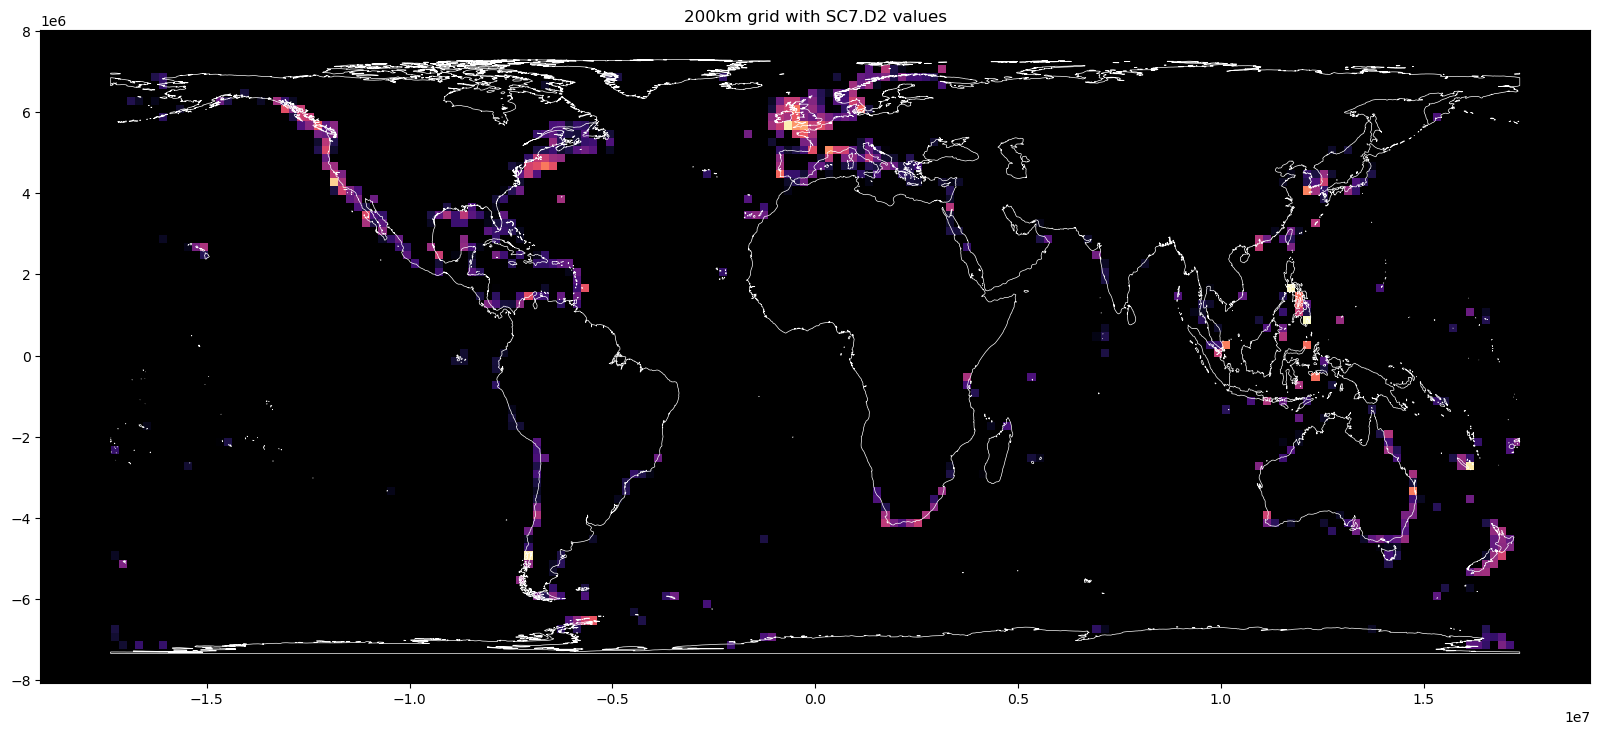

In [40]:
for sc in scs:
    map_inext_results(200, sc)